<a href="https://colab.research.google.com/github/AnannyaSagar/Bank-Effectiveness-Prediction/blob/main/Bank_Marketing_Effectiveness_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting the effectiveness of bank marketing campaigns </u></b>

## <b> Problem Description </b>

### The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).


## <b> Data Description </b>

## <b>Input variables: </b>
### <b> Bank Client data: </b>

* ### age (numeric)
* ### job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* ### marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* ### education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* ### default: has credit in default? (categorical: 'no','yes','unknown')
* ### housing: has housing loan? (categorical: 'no','yes','unknown')
* ### loan: has personal loan? (categorical: 'no','yes','unknown')

### <b> Related with the last contact of the current campaign:</b>
* ### contact: contact communication type (categorical: 'cellular','telephone')
* ### month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* ### day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* ### duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### <b>Other attributes: </b>
* ### campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* ### pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* ### previous: number of contacts performed before this campaign and for this client (numeric)
* ### poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


### <b>Output variable (desired target):</b>
* ### y - has the client subscribed a term deposit? (binary: 'yes','no')

In [4]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df=pd.read_csv("/content/drive/MyDrive/Almabetter Notes/bank-full.csv",delimiter=';')


In [7]:
#number of rows and columns
df.shape

(45211, 17)

In [8]:
#first five rows
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [9]:
#last five rows
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [10]:
#random five rows
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
21294,36,management,married,tertiary,no,6,yes,no,cellular,18,aug,166,3,-1,0,unknown,no
15370,31,management,single,tertiary,no,3981,yes,no,cellular,18,jul,286,1,-1,0,unknown,no
15424,36,self-employed,married,tertiary,no,16,yes,yes,cellular,18,jul,95,4,-1,0,unknown,no
39710,21,blue-collar,single,secondary,no,2265,no,no,cellular,27,may,156,4,99,2,success,no
45085,25,technician,single,secondary,no,325,no,no,cellular,22,oct,716,3,-1,0,unknown,yes


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [12]:
#looking for null values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [13]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [14]:
#making a copy of the original dataset
df1=df.copy()

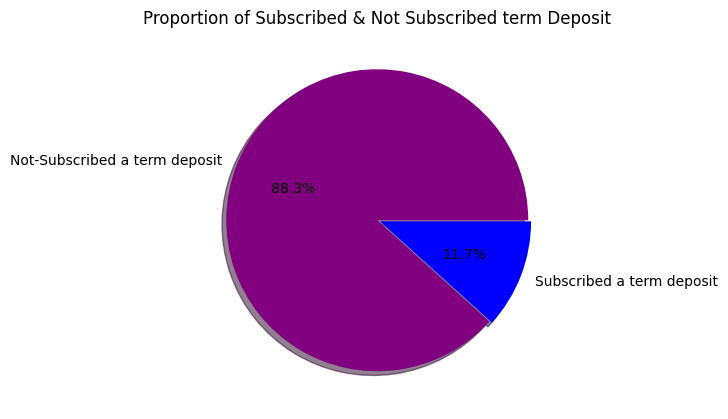

In [18]:
#piechart for percentage of number of subscribers and non-subscribers for term deposit(Traget Variable)
plt.figure(figsize=(7,5), dpi=100)
proportion = df1['y'].value_counts()
labels = ['Not-Subscribed a term deposit','Subscribed a term deposit']
plt.title('Proportion of Subscribed & Not Subscribed term Deposit')
plt.pie(proportion, explode=(0,0.02),labels=labels, shadow = True, autopct = '%1.1f%%', colors= ['purple','blue'])
plt.show()


We can see from the above plot that the dataset is imbalanced, where the number 

of Subscribed class is close to 8 times the number of Not-Subscribed Class.

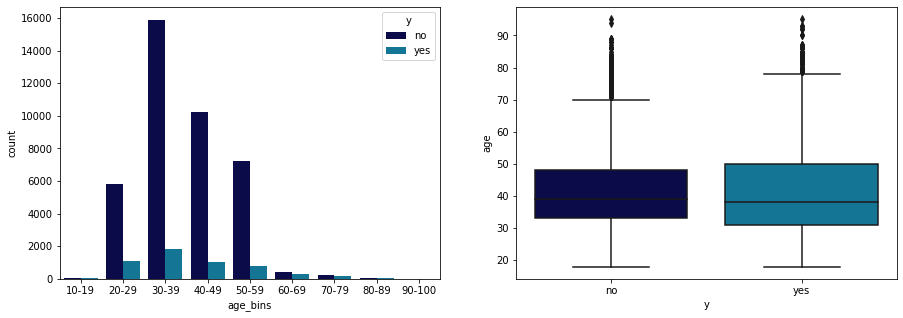

In [20]:
#plot for 'age' variable
df1['age_bins'] = pd.cut(x=df1['age'], bins=[10,20,30,40,50,60,70,80,90,100],labels=['10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-100'])

fig, axes = plt.subplots(1, 2,figsize = (15,5))
sns.countplot(x='age_bins',data=df1, palette='ocean',hue='y',ax = axes[0])
sns.boxplot(x=df1['y'],y=df1['age'],ax = axes[1],palette= 'ocean');

* Majority of the customers are of the age group 30-39. Followed by 40-49 and 50-59.
* The box plot for both the subscribed and not-subscribed customers looks the same.
* In No class, outliers are present above age 70 and for Yes class, outliers are present above age 75.

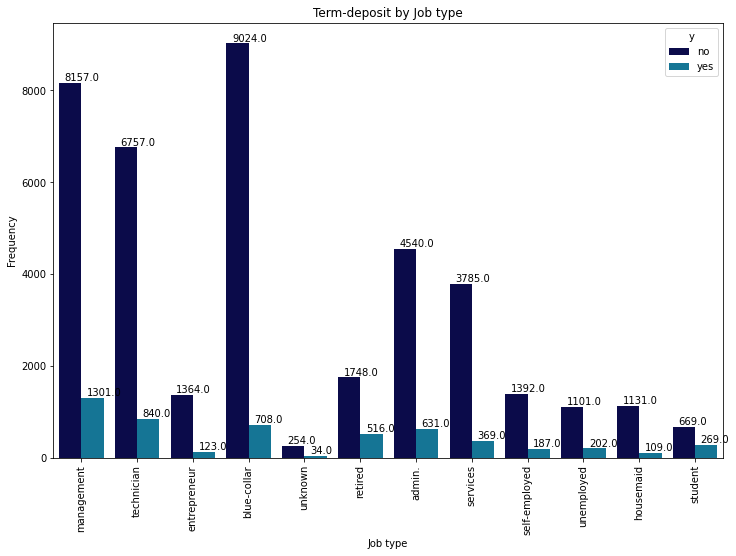

In [21]:
#plot showing term-deposit by job type
plt.figure(figsize=(12,8))
ax = sns.countplot(df1['job'],hue = df1['y'], data=df1,palette ='ocean' )
plt.title('Term-deposit by Job type')
plt.xlabel('Job type')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

In [22]:
df1.groupby(['job','y'])['y'].count()/df1.groupby('job')['y'].count()

job            y  
admin.         no     0.877973
               yes    0.122027
blue-collar    no     0.927250
               yes    0.072750
entrepreneur   no     0.917283
               yes    0.082717
housemaid      no     0.912097
               yes    0.087903
management     no     0.862444
               yes    0.137556
retired        no     0.772085
               yes    0.227915
self-employed  no     0.881571
               yes    0.118429
services       no     0.911170
               yes    0.088830
student        no     0.713220
               yes    0.286780
technician     no     0.889430
               yes    0.110570
unemployed     no     0.844973
               yes    0.155027
unknown        no     0.881944
               yes    0.118056
Name: y, dtype: float64

Majority of the customers contacted by the bank have blue collar jobs but the chances of taking a term deposit is higher in student and retired profesionals.

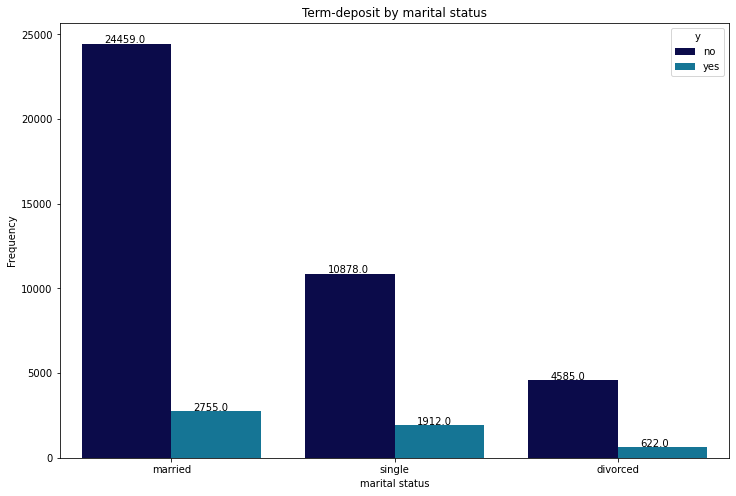

In [23]:
#plot showing term-deposit by marital status
plt.figure(figsize=(12,8))
ax = sns.countplot(df1['marital'],hue = df1['y'], data=df1,palette ='ocean' )
plt.title('Term-deposit by marital status')
plt.xlabel('marital status')
plt.ylabel('Frequency')

for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

Majority of the customers are married. Followed by Single, divorced and unknown.

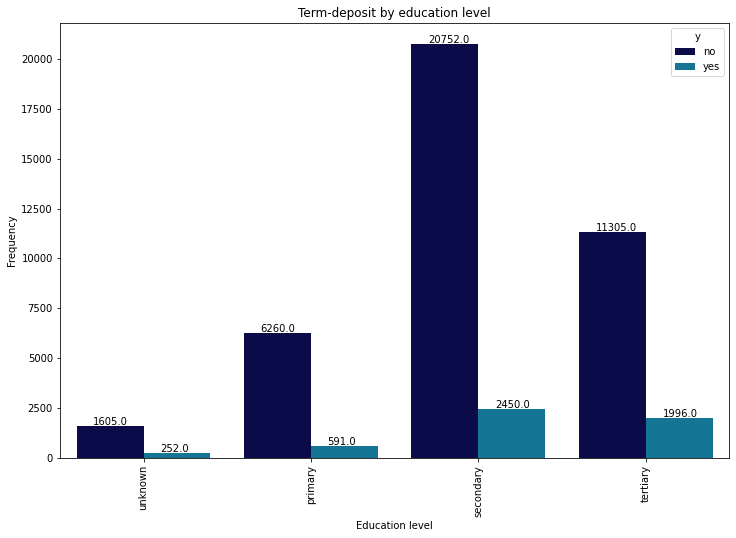

In [24]:
#plot showing term-deposit by education level
plt.figure(figsize=(12,8))
ax = sns.countplot(df1['education'],hue = df1['y'], data=df1,palette ='ocean',order=['unknown','primary','secondary','tertiary'] )
plt.title('Term-deposit by education level')
plt.xlabel('Education level')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))


In [25]:
df1.groupby(['education','y'])['y'].count()/df1.groupby('education')['y'].count()

education  y  
primary    no     0.913735
           yes    0.086265
secondary  no     0.894406
           yes    0.105594
tertiary   no     0.849936
           yes    0.150064
unknown    no     0.864297
           yes    0.135703
Name: y, dtype: float64

Majority of the customers have secondary education as the highest level of education and people who have attained upto tertiary level of education have higher probability to take a term deposit.

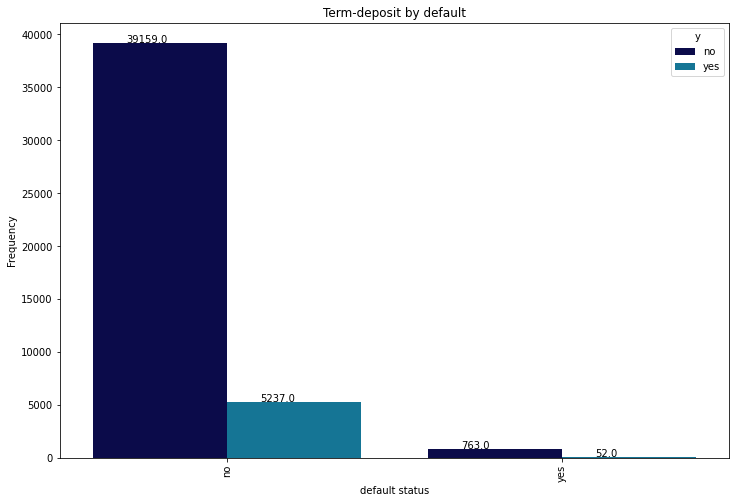

In [26]:
#plot showing term-deposit by credit default
plt.figure(figsize=(12,8))
ax = sns.countplot(df1['default'],hue = df1['y'], data=df1,palette ='ocean' )
plt.title('Term-deposit by default')
plt.xlabel('default status')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

We can clearly see that the people with default status as ‘no’ are the most who have been contacted by the bank for the deposits. People with default status ‘yes’ have not been contacted by the bank at all. 

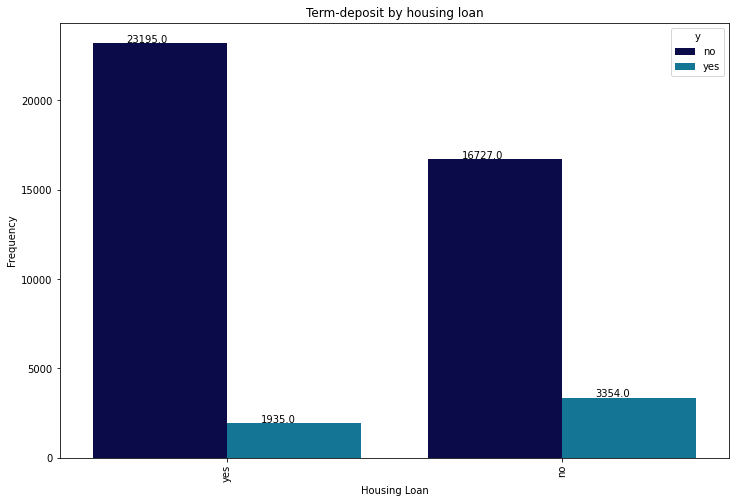

In [27]:
#plot showing term-deposit by housing loan
plt.figure(figsize=(12,8))
ax = sns.countplot(df1['housing'],hue = df1['y'], data=df1,palette ='ocean' )
plt.title('Term-deposit by housing loan')
plt.xlabel('Housing Loan')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))


Majority of the customers have a housing loan.But those who do not have a housing loan are more likely to subscribe to a term-deposit.

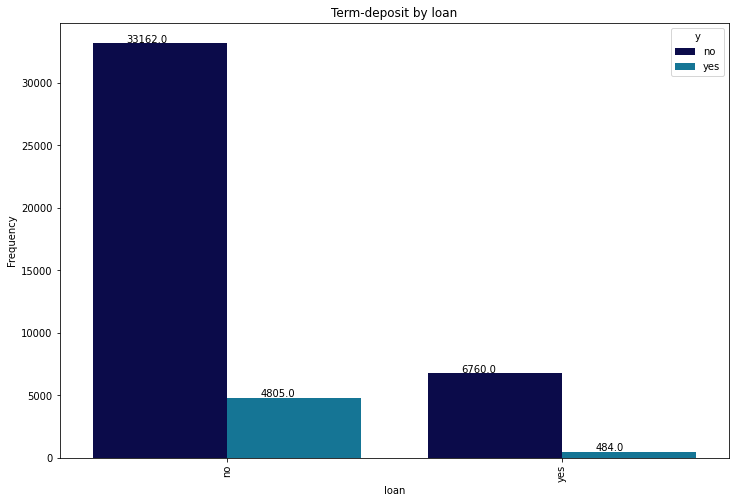

In [28]:
#plot showing term-deposit by loan
plt.figure(figsize=(12,8))
ax = sns.countplot(df1['loan'],hue = df1['y'], data=df1,palette ='ocean' )
plt.title('Term-deposit by loan')
plt.xlabel('loan')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

Very few people have taken a loan and those are more likely to take a term-deposit.

In [29]:
df1['y']=df1['y'].map({'yes':1,'no':0})

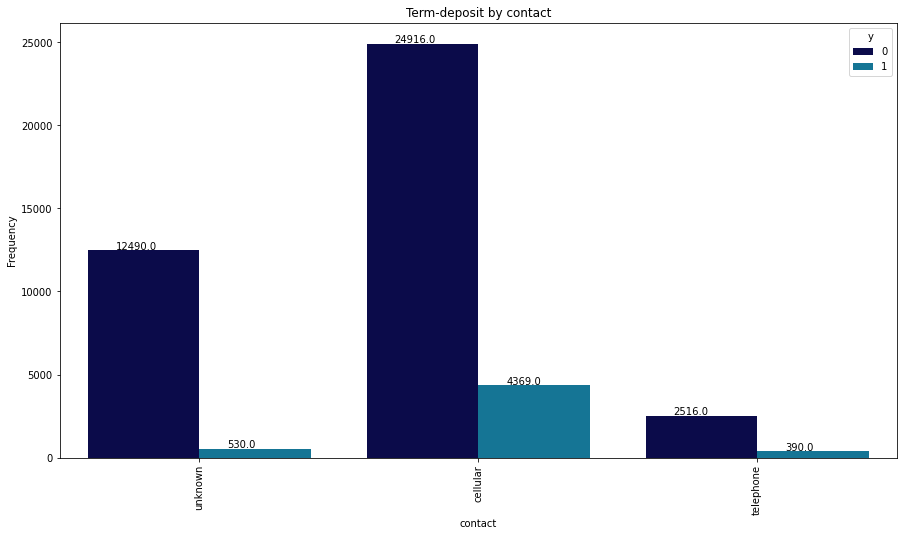

In [30]:
#plot showing term-deposit by contact
plt.figure(figsize=(15,8))
ax = sns.countplot(df1['contact'],hue = df1['y'], data=df1,palette ='ocean')
plt.title('Term-deposit by contact')
plt.xlabel('contact')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))


In [31]:
df1.groupby(['contact','y'])['y'].count()/df1.groupby('contact')['y'].count()

contact    y
cellular   0    0.850811
           1    0.149189
telephone  0    0.865795
           1    0.134205
unknown    0    0.959293
           1    0.040707
Name: y, dtype: float64

Most of the customers have been contacted by cellular rather than telephone.But the subscription rate is same for both the cellular and telephone contacts. Thus we can say contacts made to the customer through the mode of telephone are more likely to subscribe for the term deposit.

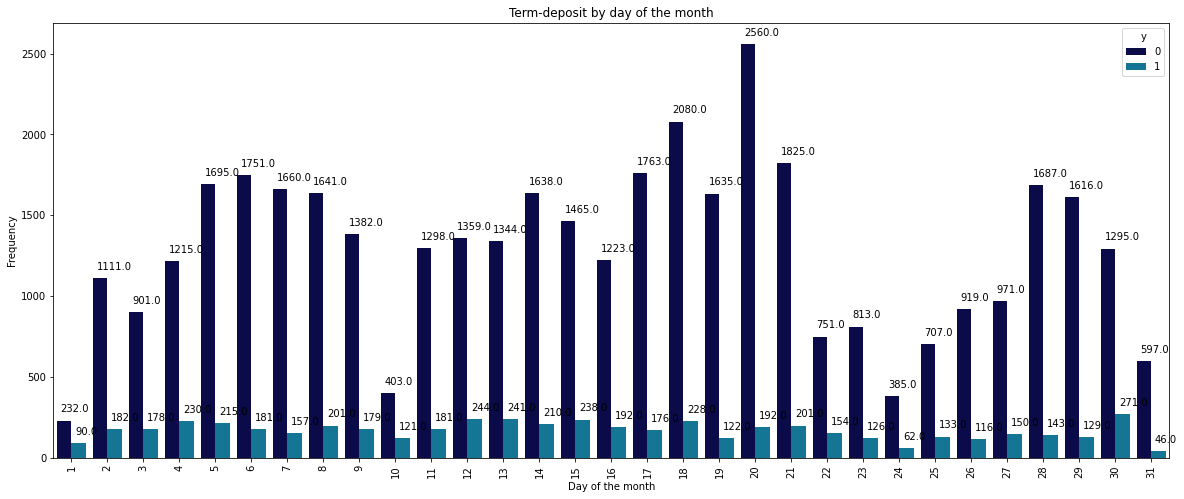

In [32]:
#plot showing term-deposit by day of month
plt.figure(figsize=(20,8))
ax = sns.countplot(df1['day'],hue = df1['y'], data=df1,palette ='ocean')
plt.title('Term-deposit by day of the month')
plt.xlabel('Day of the month')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

* From the above plot it is clear that all the days have nearly the similar distribution for people subscribing for the term deposit. 
* Bank contacts more people between 17-21.

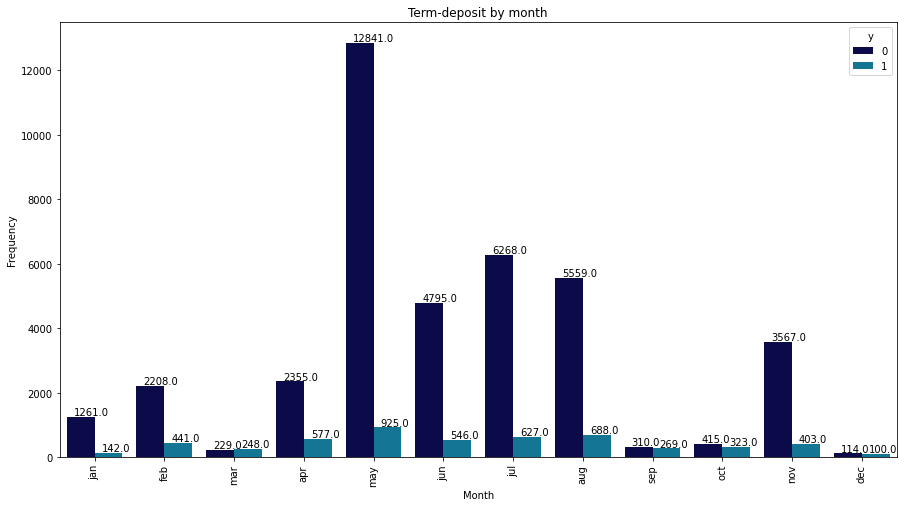

In [33]:
#plot showing term-deposit by month
plt.figure(figsize=(15,8))
ax = sns.countplot(df1['month'],hue = df1['y'], data=df1,palette ='ocean',order= ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul','aug', 'sep', 'oct', 'nov', 'dec'] )
plt.title('Term-deposit by month')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

* People have been contacted more in the month of May, followed by July, August, June,November. Very few people have been contacted in the month of December. 
* People contacted in May have higher chances to subscribe for  term deposits but have also higher chances for not subscribing the long term deposits. Very few people are contacted in the month of March, September,October,December  and have almost equal chances for subscribing the deposits or not.

Text(0, 0.5, 'Duration')

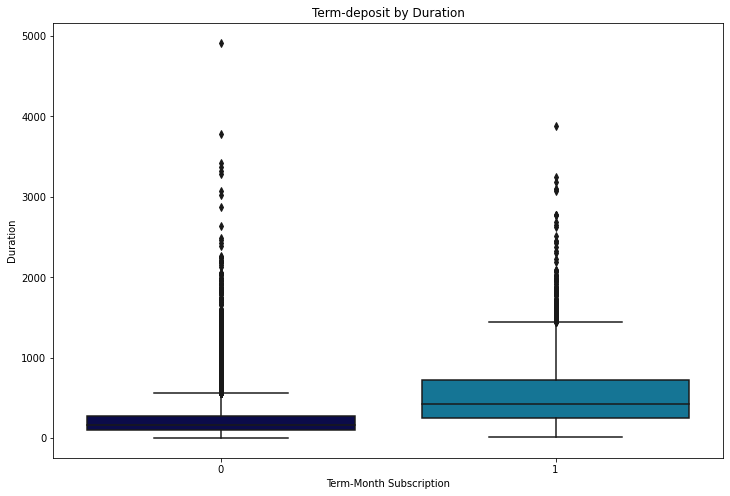

In [34]:
#plot showing term-deposit by duration
plt.figure(figsize=(12,8))
sns.boxplot(x=df1['y'],y=df1['duration'],palette='ocean')
plt.title('Term-deposit by Duration')
plt.xlabel('Term-Month Subscription')
plt.ylabel('Duration')

Customers who subscribed to term deposits have relatively higher duration.

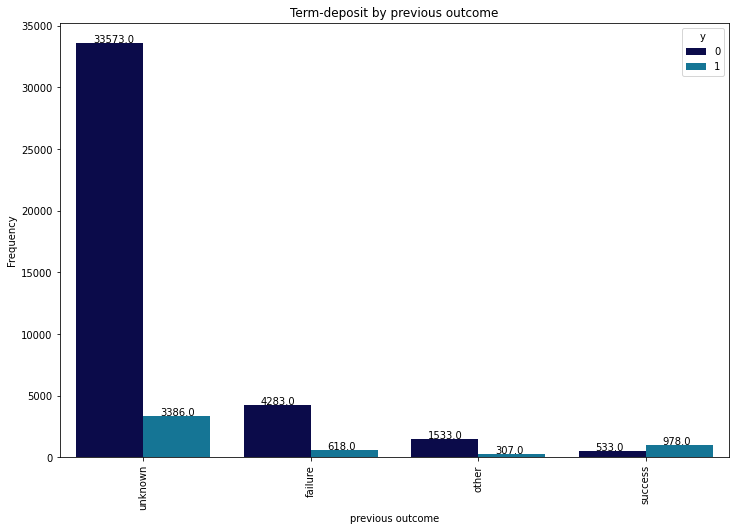

In [35]:
#plot showing term-deposit by previous outcome
plt.figure(figsize=(12,8))
ax = sns.countplot(df1['poutcome'],hue = df1['y'], data=df1,palette ='ocean' )
plt.title('Term-deposit by previous outcome')
plt.xlabel('previous outcome')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

In [36]:
df1.groupby(['poutcome','y'])['y'].count()/df1.groupby('poutcome')['y'].count()


poutcome  y
failure   0    0.873903
          1    0.126097
other     0    0.833152
          1    0.166848
success   0    0.352747
          1    0.647253
unknown   0    0.908385
          1    0.091615
Name: y, dtype: float64

Outcome of the previous campaign is unknown for most of the customers but of the customers who had a successful outcome from the previous campaign, 64% of those customers did subscribe for a term deposit. 

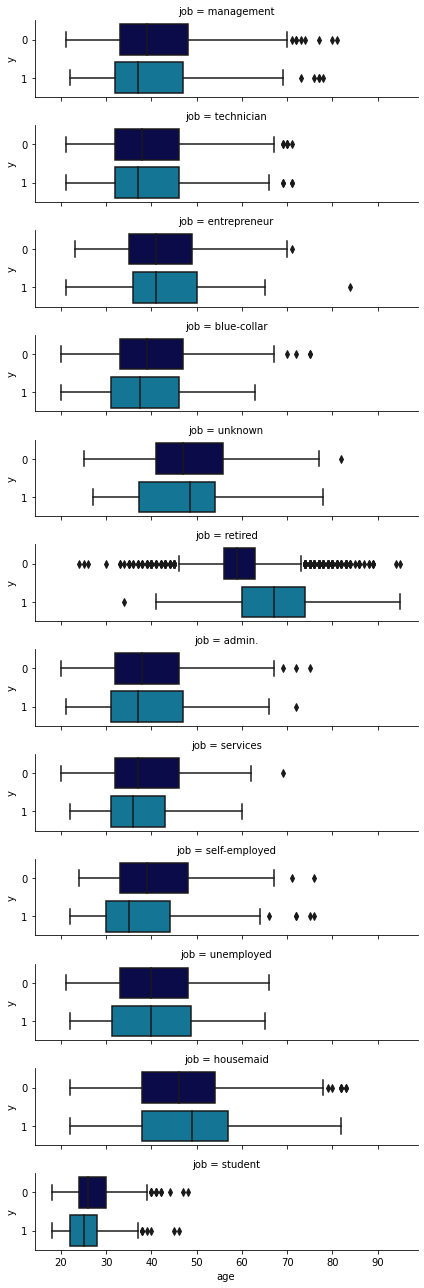

In [37]:
#plot showing term-deposit by job type
g = sns.catplot(x="age", y="y", row="job",
                kind="box", orient="h", height=1.5, aspect=4,
                data=df1,palette='ocean')

* There is not much agewise difference in subscription to the term deposit if the job profile is entrepreneur, admin, unemployed.
* People of profession- management, technician, blue-collar, unknown, services,  self employed, student who subscribe to the term deposit are more likely to subscribe in their younger age.
* People of profession- unknown, retired, housemaid who subscribe to the term deposit have their mean age higher than those who don’t subscribe for the term deposit.

